In [14]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib ipympl

# steps of the assingment
1) load files, x & y into a table
2) create a common index, which can be used for a table (inner) join
3) join tables
4) display the geometry 
5) apply a color map on the geometry, such that it encodes the population dencity feature.


In [15]:
#step-1
sf = gpd.read_file("Data/assingment2/tl_2019_06_tract.shp", crs=4326)
data = gpd.read_file("Data/assingment2/ACSST5Y2019.S0101_data_with_overlays_2022-02-23T021622.csv")
data["S0101_C01_001E"]

# Delete first row by selecting last n-1 rows
data =  data.tail(data.shape[0] -1)
data = data.drop(columns=["geometry"])
data.rename(columns={"S0101_C01_001E":"total_pop"})
data["GEOID"] = data["GEO_ID"].str.removeprefix("1400000US")

data.set_index('GEOID')
sf.set_index('GEOID')
data.head(2)

GEO_ID                                           NAME  \
1  1400000US06001400100  Census Tract 4001, Alameda County, California   
2  1400000US06001400200  Census Tract 4002, Alameda County, California   

  S0101_C01_001E S0101_C01_001M S0101_C01_002E S0101_C01_002M S0101_C01_003E  \
1           3120            208            188             94             56   
2           2007            120            142             50             68   

  S0101_C01_003M S0101_C01_004E S0101_C01_004M  ... S0101_C06_034M  \
1             49            168             73  ...            (X)   
2             30            122             46  ...            (X)   

  S0101_C06_035E S0101_C06_035M S0101_C06_036E S0101_C06_036M S0101_C06_037E  \
1            (X)            (X)            (X)            (X)            (X)   
2            (X)            (X)            (X)            (X)            (X)   

  S0101_C06_037M S0101_C06_038E S0101_C06_038M        GEOID  
1            (X)            (X)            (X)  06001400100  
2            (X)            (X)            (X)  06001400200  

[2 rows x 459 columns]

In [44]:
#merge base on GEOID
import pandas as pd
df = pd.merge(sf, data, on="GEOID")

In [45]:
df["population_dencity"] = round(1000000 * ((df["S0101_C01_001E"].astype(int))/df["ALAND"]))

In [50]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 8057 entries, 0 to 8056
Columns: 472 entries, STATEFP to population_dencity
dtypes: float64(1), geometry(1), int64(2), object(468)
memory usage: 29.1+ MB


C:\Users\windows-game-pc\Desktop\GIS\env\lib\site-packages\geopandas\plotting.py:673: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


<AxesSubplot:>

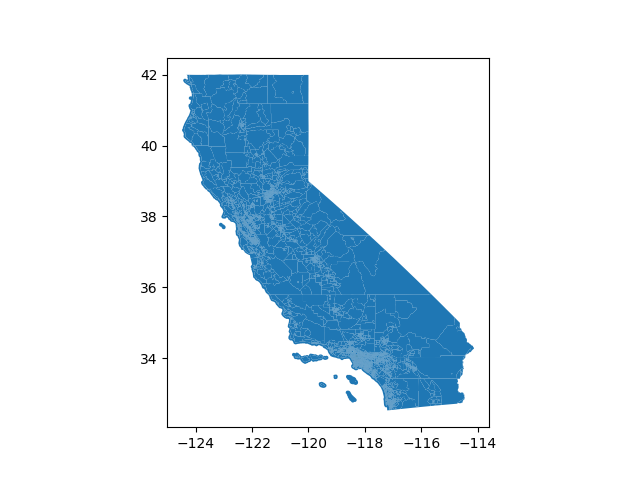

In [76]:
df.plot(x=")

<AxesSubplot:>

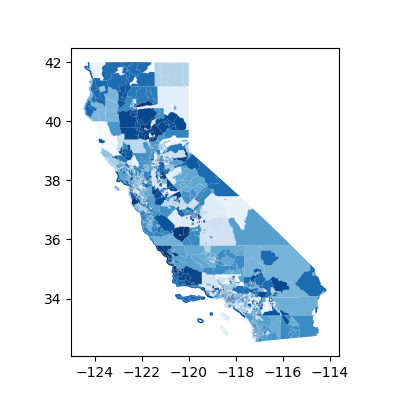

In [46]:
#example of plotting geometry features. 
fig, ax = plt.subplots(figsize=(4,4))
df.plot(ax=ax, cmap="Blues")

#coloring of the map based on population dencity, where the color treshold are based on the limits. 

In [18]:
df["population_dencity"].min(), df["population_dencity"].max()

(0.0, 59959.0)

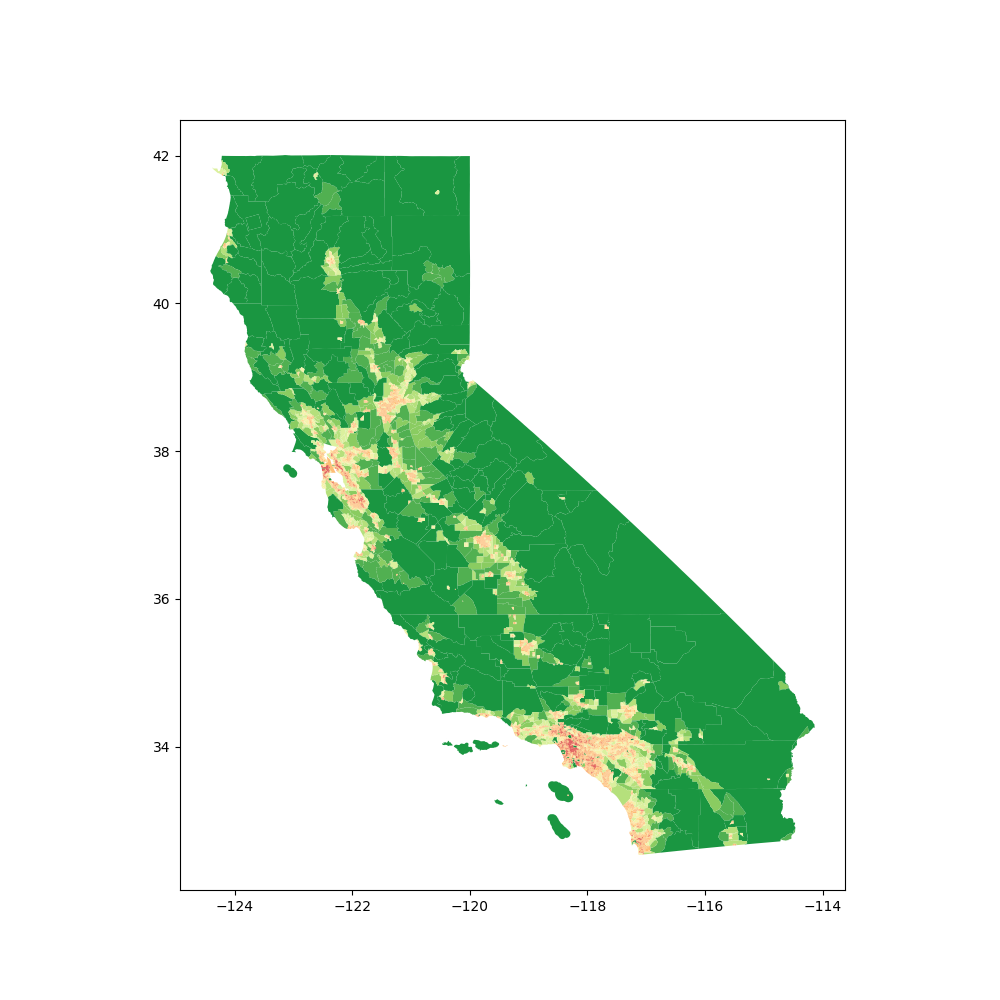

In [74]:
import matplotlib.colors as clr

custom_color_map = ["#1a9641","#58b453", "#96d265", "#c4e687", "#ebf7ad","#ffedab","#fec981","#f99d59","#e85b3b","#d7191c"]
colormap = clr.LinearSegmentedColormap.from_list('POP', custom_color_map)
limits = np.array([1, 10, 25, 50, 100, 250, 500, 1000, 4000, 5000, 6000])
norm = clr.BoundaryNorm(np.append(limits, 6000), ncolors=256)

fig, ax = plt.subplots(figsize=(10,10))
df.plot(ax=ax, column="population_dencity", cmap=colormap, norm=norm)
plt.savefig("ca_population.png")
plt.show()

In [25]:
df["ALAND"].max(), df["ALAND"].mean(), df["ALAND"].min() 

(18004913928, 50100544.679409206, 0)

Color map based on landsize (bit redudent ofcourse)

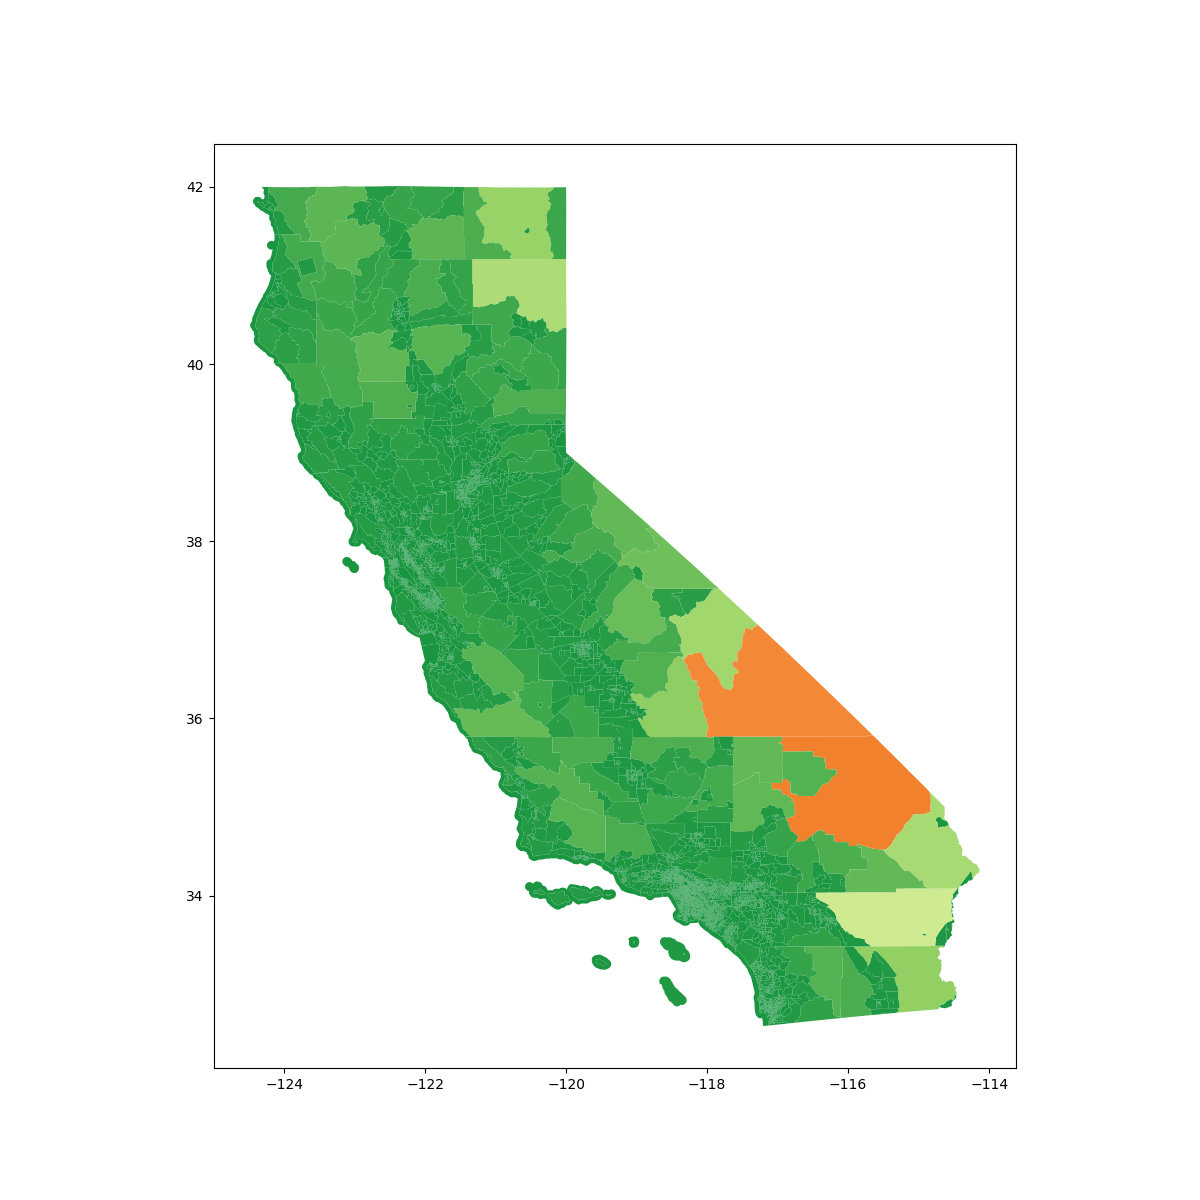

In [32]:
custom_color_map = ["#1a9641","#58b453", "#96d265", "#c4e687", "#ebf7ad","#ffedab", "#f2812e"]
#custom_color_map = custom_color_map.reverse()
colormap = clr.LinearSegmentedColormap.from_list('POP', custom_color_map)
limits = np.array([0,1000, df["ALAND"].mean()/2, df["ALAND"].mean(), df["ALAND"].max()/3, df["ALAND"].max()-1])
norm = clr.BoundaryNorm(np.append(limits, df["ALAND"].max()), ncolors=256)

fig, ax = plt.subplots(figsize=(12,12))
df.plot(ax=ax, column="ALAND", cmap=colormap)
plt.savefig("ca_landsize.png")
plt.show()